In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dependencies Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



Collecting and processing data

In [ ]:
# Loading the patients data to a pandas dataframe
patient_data = pd.read_csv('drive/My Drive/Colab Notebooks/heart_2020_cleaned.csv')

In [ ]:
# Show the first 5 rows of the dataset
patient_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Data Analysis

In [ ]:
patient_data['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
patient_data.groupby(['AgeCategory', 'HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              20934
             Yes               130
25-29        No              16822
             Yes               133
30-34        No              18527
             Yes               226
35-39        No              20254
             Yes               296
40-44        No              20520
             Yes               486
45-49        No              21047
             Yes               744
50-54        No              23999
             Yes              1383
55-59        No              27555
             Yes              2202
60-64        No              30359
             Yes              3327
65-69        No              30050
             Yes              4101
70-74        No              26218
             Yes              4847
75-79        No              17433
             Yes              4049
80 or older  No              18704
             Yes              5449
Name: HeartDisease, dtype: int64

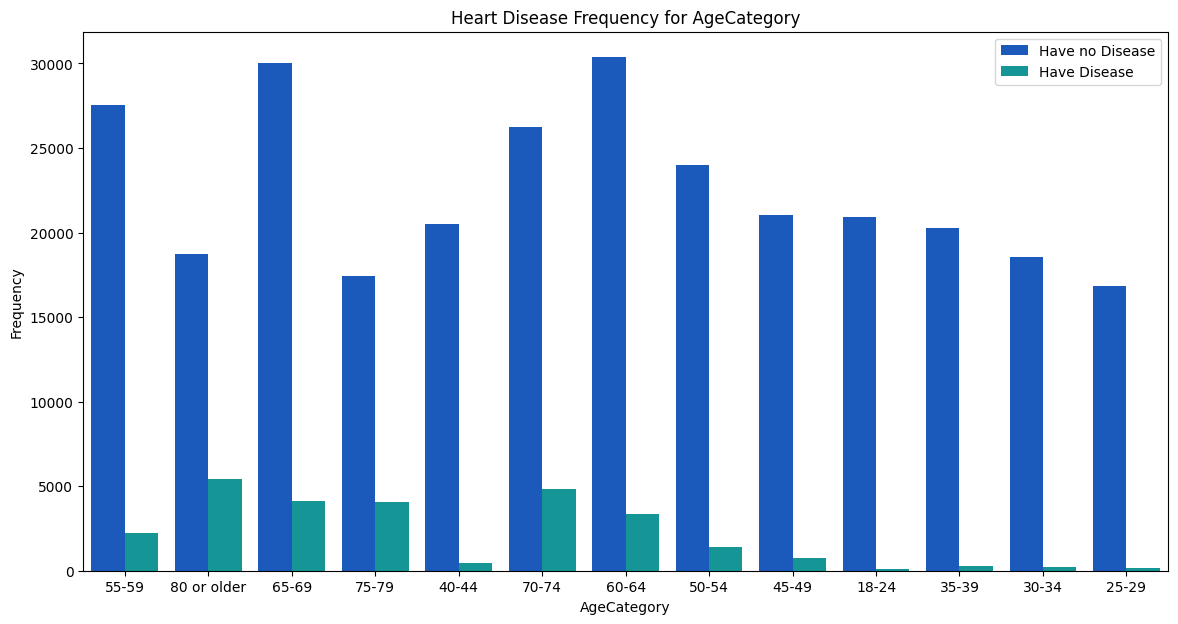

In [ ]:
# Show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=patient_data, hue='HeartDisease', palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Have no Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

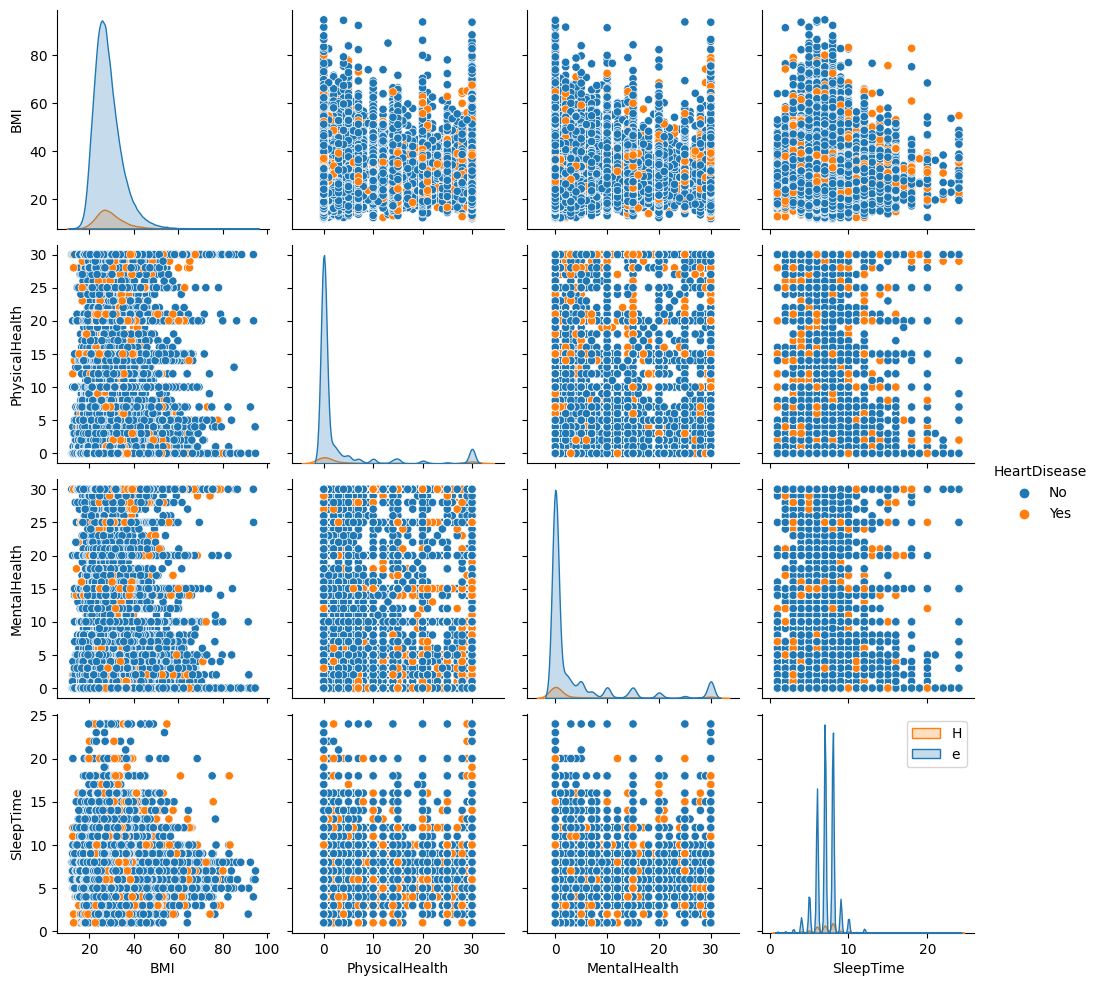

In [ ]:
# Check the Distrubtion and Skewness of the features
sns.pairplot(data = patient_data, hue='HeartDisease')
plt.legend('HeartDisease')

In [ ]:
# Check rows and columns
patient_data.shape

(319795, 18)

In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Looking for any missing value
patient_data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# Get data type of each column in form of series
obj_list = patient_data.select_dtypes(include='object').columns
obj_list

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
# Encoding the target labels with 0 and 1
le = LabelEncoder()
for obj in obj_list:
  patient_data[obj] = le.fit_transform(patient_data[obj].astype(str))

In [ ]:
patient_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


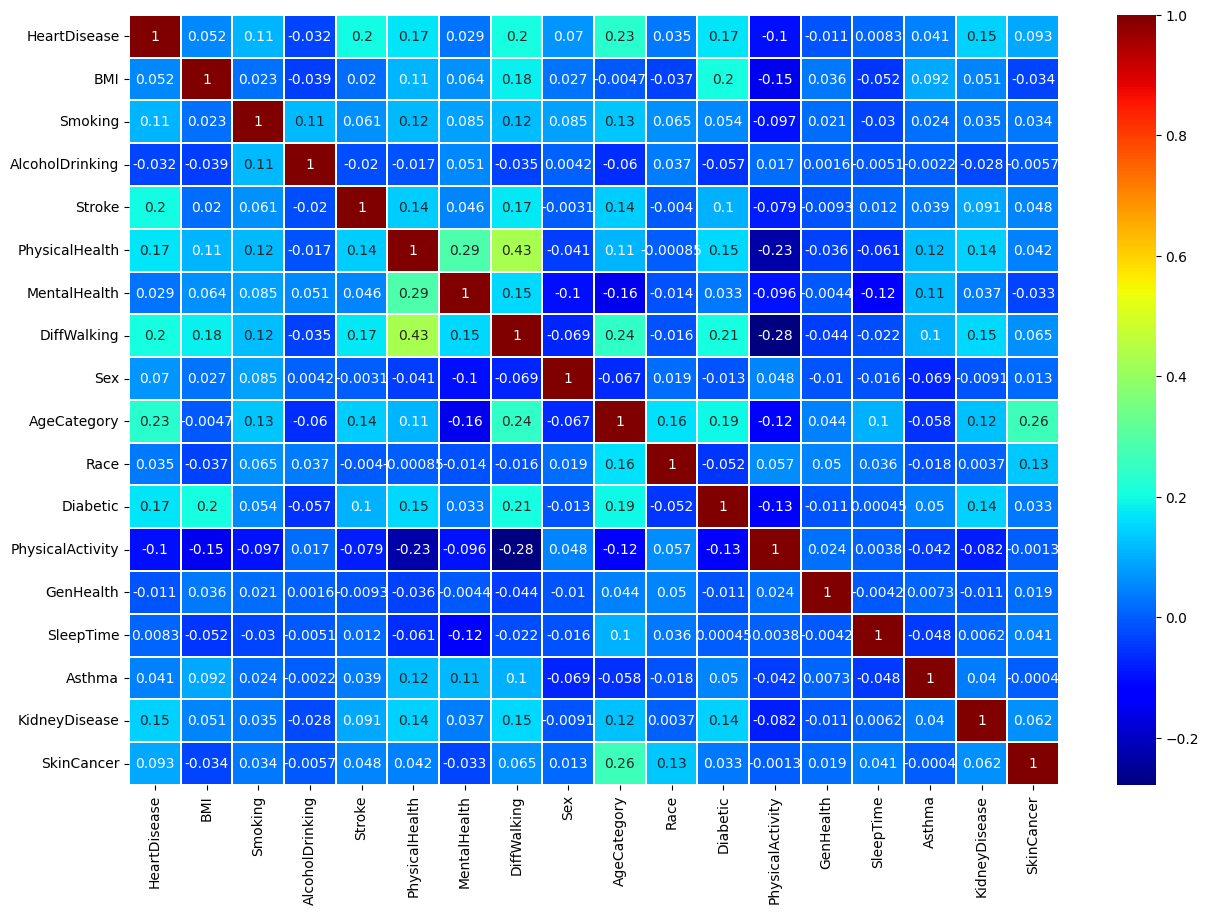

<Figure size 640x480 with 0 Axes>

In [ ]:
# Looking at the correlation matrix of the data features
plt.figure(figsize=(15,10))
sns.heatmap(patient_data.corr(), linewidth=.01,annot=True,cmap="jet")
plt.show()
plt.savefig('correlationfigure')

Data Analysis

In [ ]:
patient_data['AgeCategory'].value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

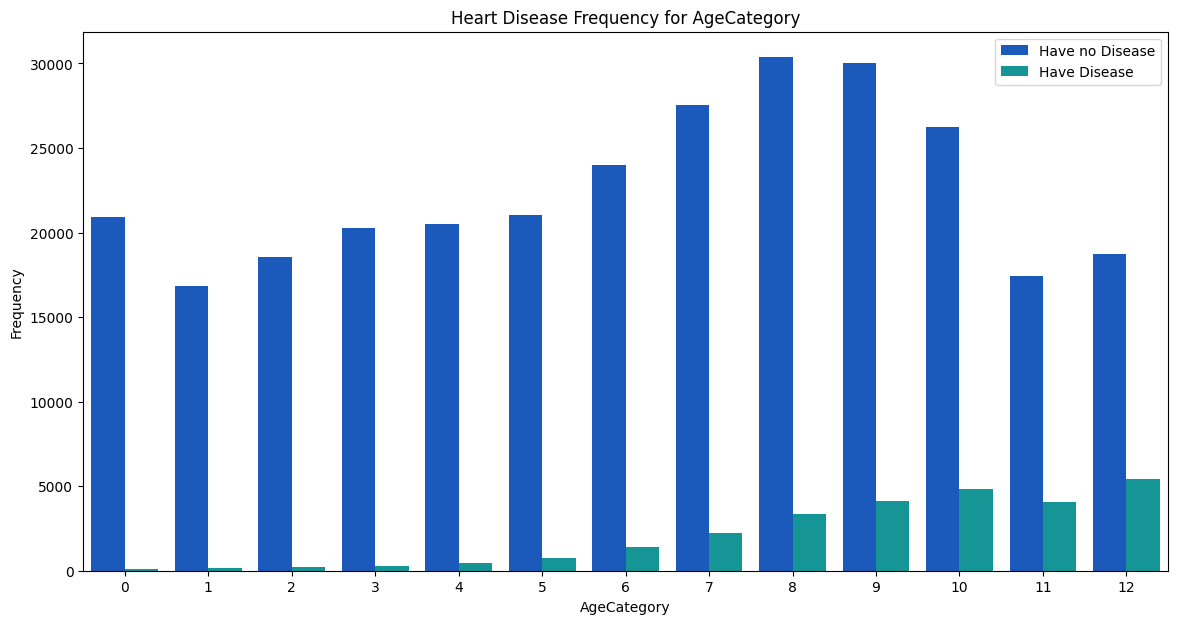

In [ ]:
# Show Heart Disease Frequency by Age Category

patient_data.groupby(['AgeCategory', 'HeartDisease'])['HeartDisease'].count()
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=patient_data, hue='HeartDisease', palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Have no Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Exploratory data analysis
Univariate and bivariate

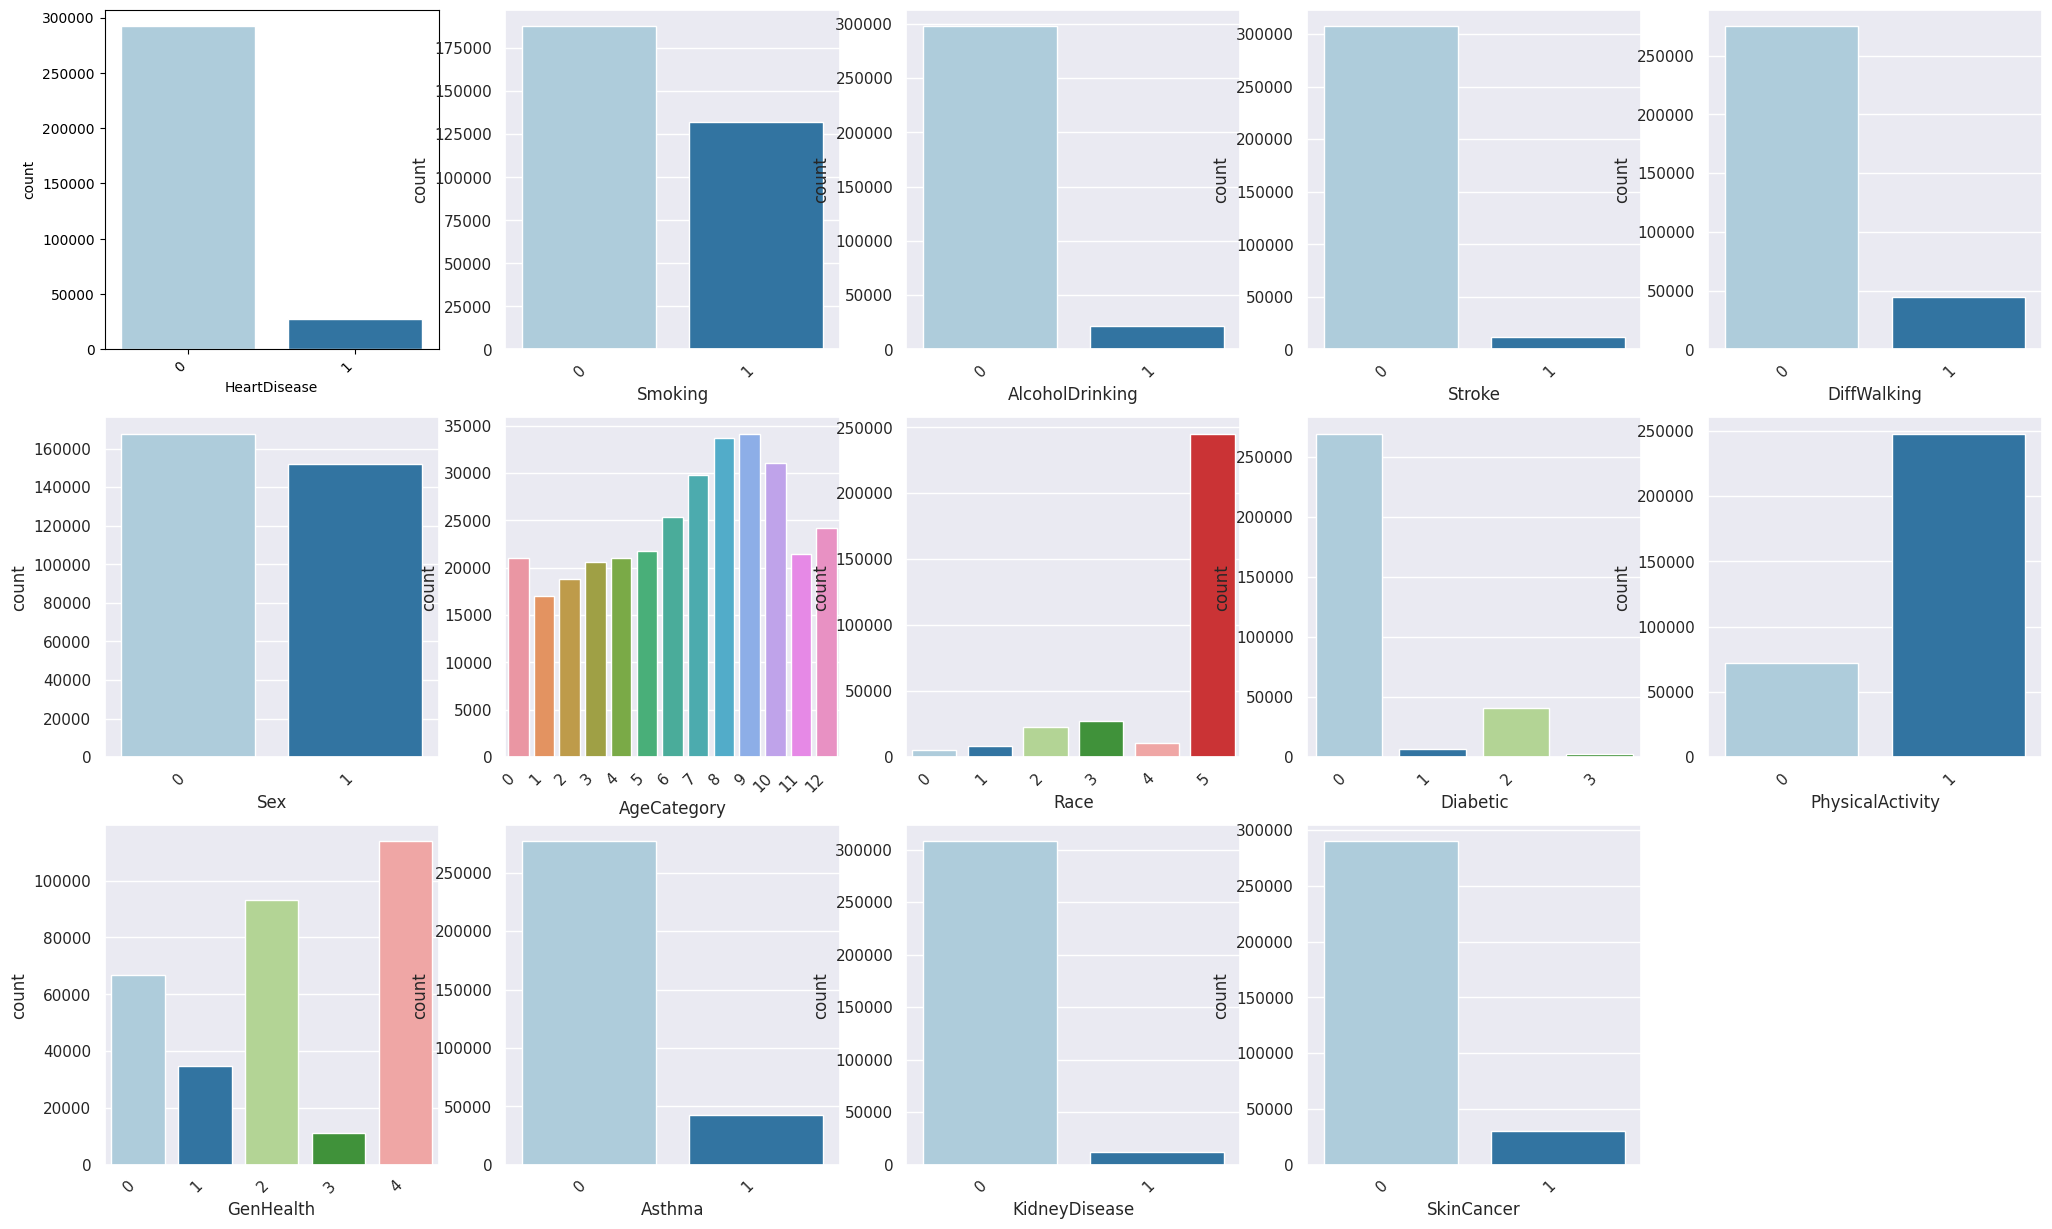

In [ ]:
# Univariate visualization of the categorical features
def obj_list_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in obj_list:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("darkgrid")
      ax = sns.countplot(x = feature, data = patient_data)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

obj_list_func()

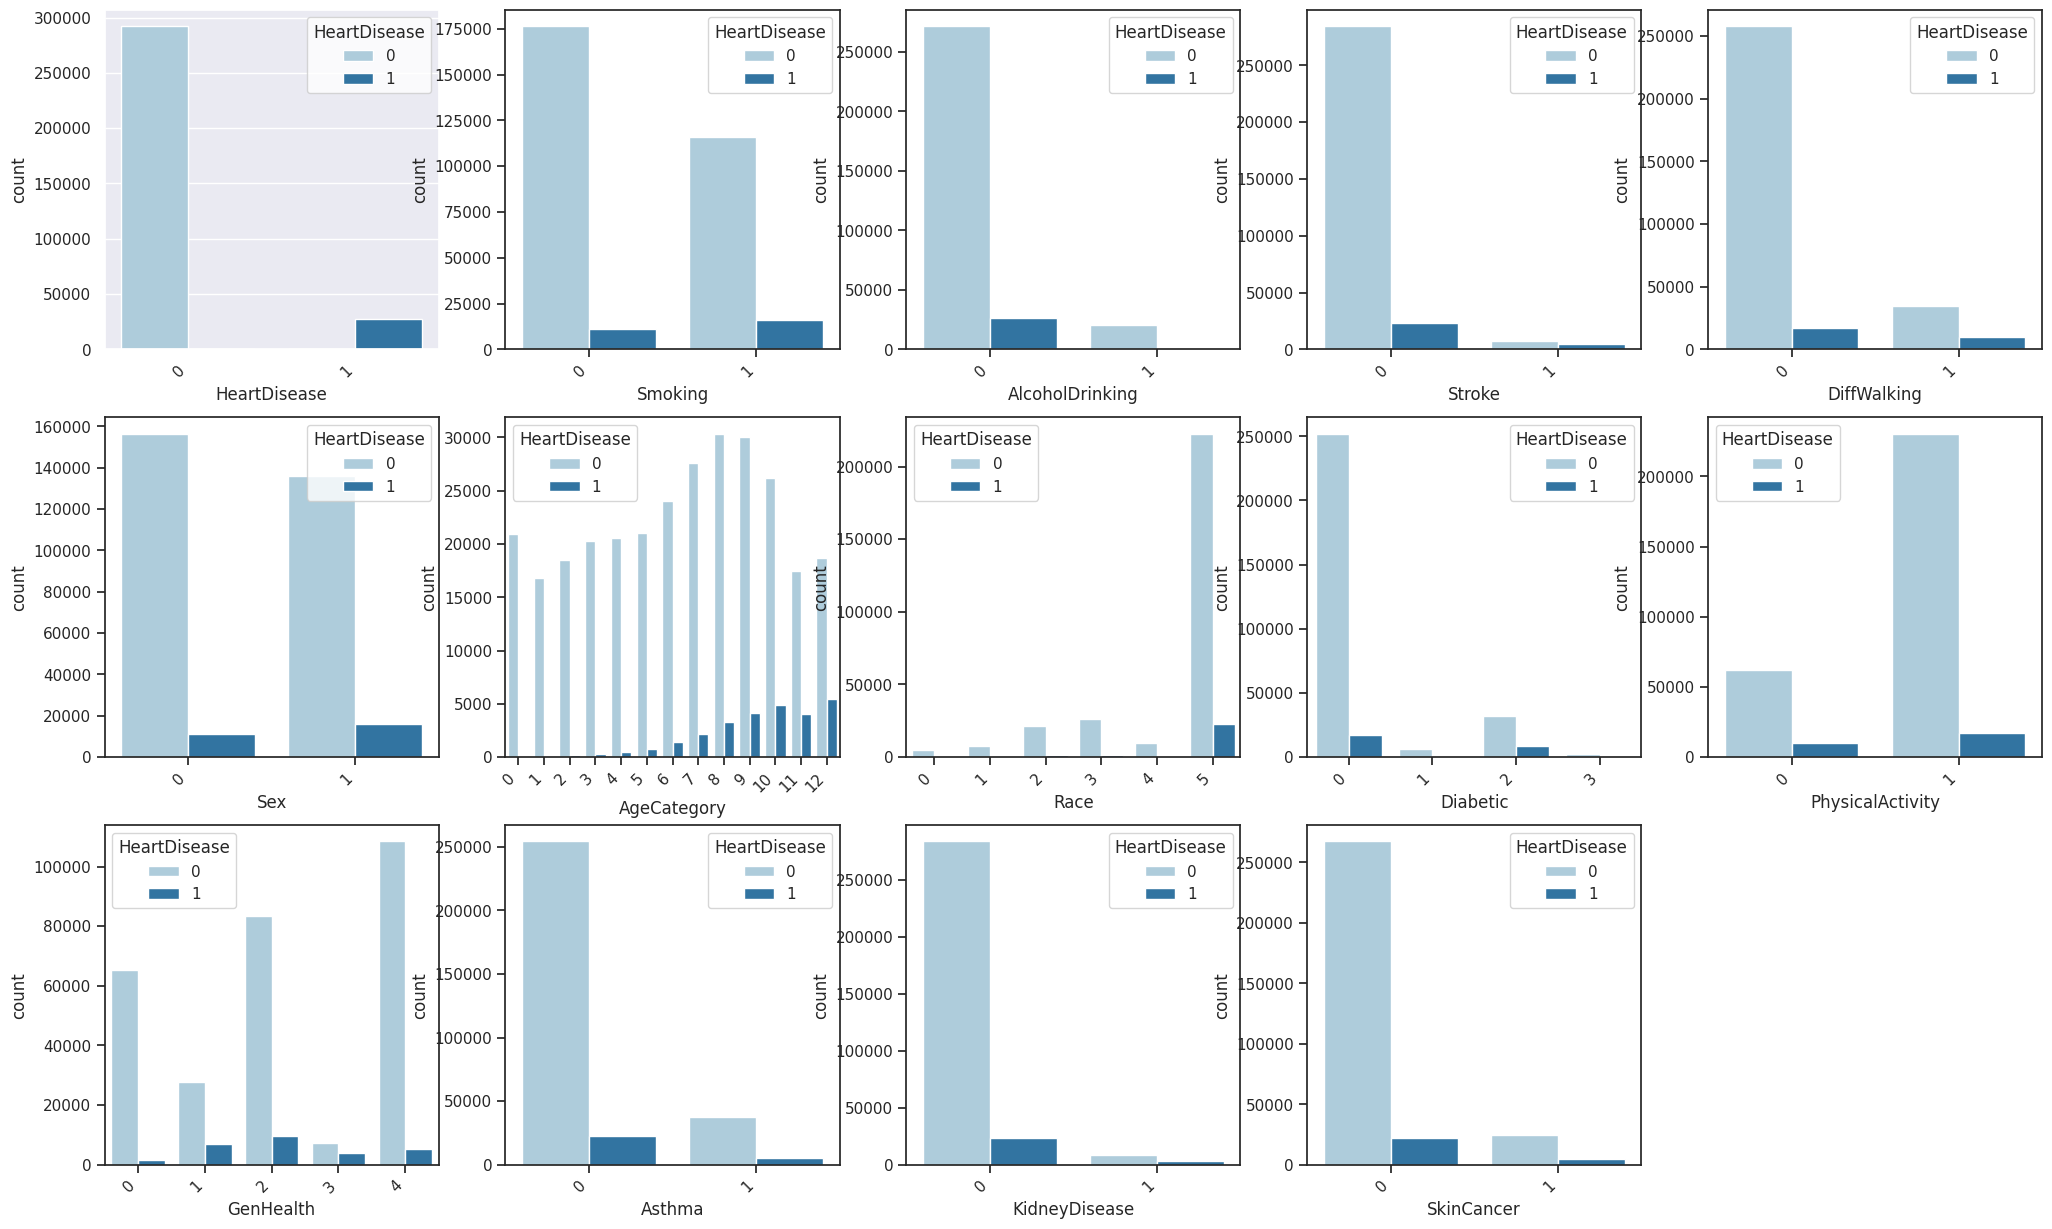

In [ ]:
# bivariate visualisation
def obj_list_func():
  i = 1
  plt.figure(figsize = (25,15))
  for feature in obj_list:
      plt.subplot(3,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = patient_data, hue = 'HeartDisease')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

obj_list_func()

Splitting the data

In [ ]:
# splitting the dataset into train and test set with 80% and 20% respectively
train_data, test_data = train_test_split(patient_data, train_size=0.80)
train_data.shape, test_data.shape

((255836, 18), (63959, 18))

In [ ]:
# splitting the train and test set into features and labels
X_train= train_data.drop('HeartDisease', axis=1)
y_train= train_data['HeartDisease']
print(X_train.shape, y_train.shape)

X_test= test_data.drop('HeartDisease', axis=1)
y_test= test_data['HeartDisease']
print(X_test.shape, y_test.shape)

(255836, 17) (255836,)
(63959, 17) (63959,)


Model training and evaluation
1: K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
prediction=knn.predict(X_test)
prediction
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[57515,   928],
       [ 5051,   465]])

2: Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(41)
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9151331321627918

In [ ]:
from sklearn.metrics import confusion_matrix
prediction=lr.predict(X_test)
prediction
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[57932,   511],
       [ 4917,   599]])

3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(41)
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

0.9042042558514048

In [ ]:
from sklearn.metrics import confusion_matrix
prediction=rf.predict(X_test)
prediction
confusion_matrix=confusion_matrix(y_test,prediction)
confusion_matrix

array([[57293,  1150],
       [ 4906,   610]])

BUILDING A PREDICTIVE SYSTEM

In [ ]:
input_data = (80,1,0,0,7.0,2.0,1,0,20,6,6,0,1,1,5,0,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we predict for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print ('Moyo upo salama')
else:
  print('Moyo wako upo katika uhatarishi wa magonjwa, Tafadhali muone daktari')

[1]
Moyo wako upo katika uhatarishi wa magonjwa, Tafadhali muone daktari


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Exporting the model

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump

# saving the model as tabirimodel.joblib
dump(lr, 'tabirimodel.joblib')


['tabirimodel.joblib']

In [ ]:
from google.colab import files
files.download("tabirimodel.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import dump

# saving the KNN model as knntabiri.joblib
dump(knn, 'knntabiri.joblib')

['knntabiri.joblib']

In [ ]:
from google.colab import files
files.download("knntabiri.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import dump

# saving the randomforest model as rftabiri.joblib
dump(rf, 'rftabiri.joblib')

['rftabiri.joblib']

In [ ]:
from google.colab import files
files.download("rftabiri.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>